In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\pavan\OneDrive\Documents\DesktopFiles\LaptopStuff\VS_code\vgsales.csv") #encoding='latin-1')

In [4]:
df = pd.read_csv(r"C:\Users\pavan\OneDrive\Documents\DesktopFiles\LaptopStuff\VS_code\vgsales.csv")
df

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

In [5]:
df = df.fillna(0)
df = df.drop_duplicates()
# Converting year to year with a different format
df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')
df['Year'] = df['Year'].dt.year
# generalizing the platforms with the company
platform_categories = {'2600': 'Other',
                       '3DO': 'Other',
                       '3DS': 'Nintendo',
                       'DC': 'Other',
                       'DS': 'Nintendo',
                       'GB': 'Nintendo',
                       'GBA': 'Nintendo',
                       'GC': 'Nintendo',
                       'GEN': 'Other',
                       'GG': 'Other',
                       'N64': 'Nintendo',
                       'NES': 'Nintendo',
                       'NG': 'Other',
                       'PC': 'PC',
                       'PCFX': 'Other',
                       'PS': 'PlayStation',
                       'PS2': 'PlayStation',
                       'PS3': 'PlayStation',
                       'PS4': 'PlayStation',
                       'PSP': 'PlayStation',
                       'PSV': 'PlayStation',
                       'SAT': 'Other',
                       'SCD': 'Other',
                       'SNES': 'Nintendo',
                       'TG16': 'Other',
                       'WS': 'Other',
                       'Wii': 'Nintendo',
                       'WiiU': 'Nintendo',
                       'X360': 'Xbox',
                       'XB': 'Xbox',
                       'XOne': 'Xbox'}
df['Platform_Category'] = df['Platform'].replace(platform_categories)
# checking for spaces and shit
df['Publisher'] = df['Publisher'].str.replace(' ', '_')


In [6]:
df

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales Platform_Category  
0             8.46         82.74          Nintendo  
1             0.77         40.24          Nintendo  
2             3.31         35.82          Nintendo  
3             2.96         33.00          Nintendo  
4             1.00         31.37          Nintendo  
...            ...           ...               ...  
16593         0.00          0.01          Nintendo  
16594         0.00          0.01          Nintendo  
16595         0.00          0.01       PlayStation  
16596         0.00          0.01          Nintendo  
16597         0.00          0.01          Nintendo  

[16598 rows x 12 columns]

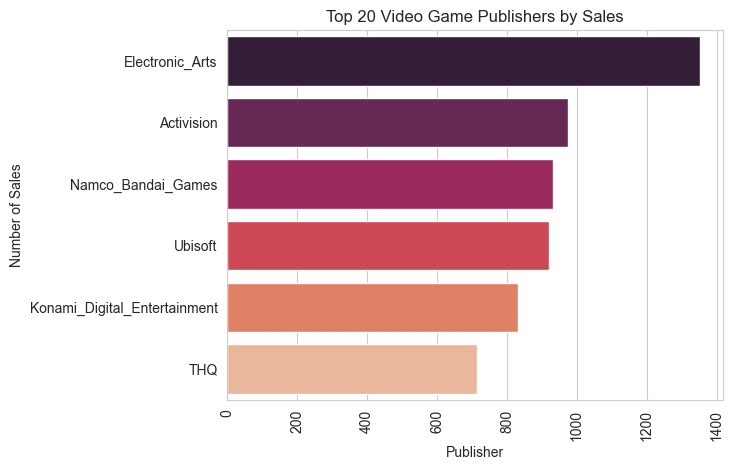

In [7]:
#top 6 publishers along with their sales
top_publishers = df["Publisher"].value_counts().nlargest(6)
sns.set_style('whitegrid')
sns.set_palette("rocket")
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title("Top 20 Video Game Publishers by Sales")
plt.xlabel("Publisher")
plt.ylabel("Number of Sales")
plt.xticks(rotation=90)
plt.show()

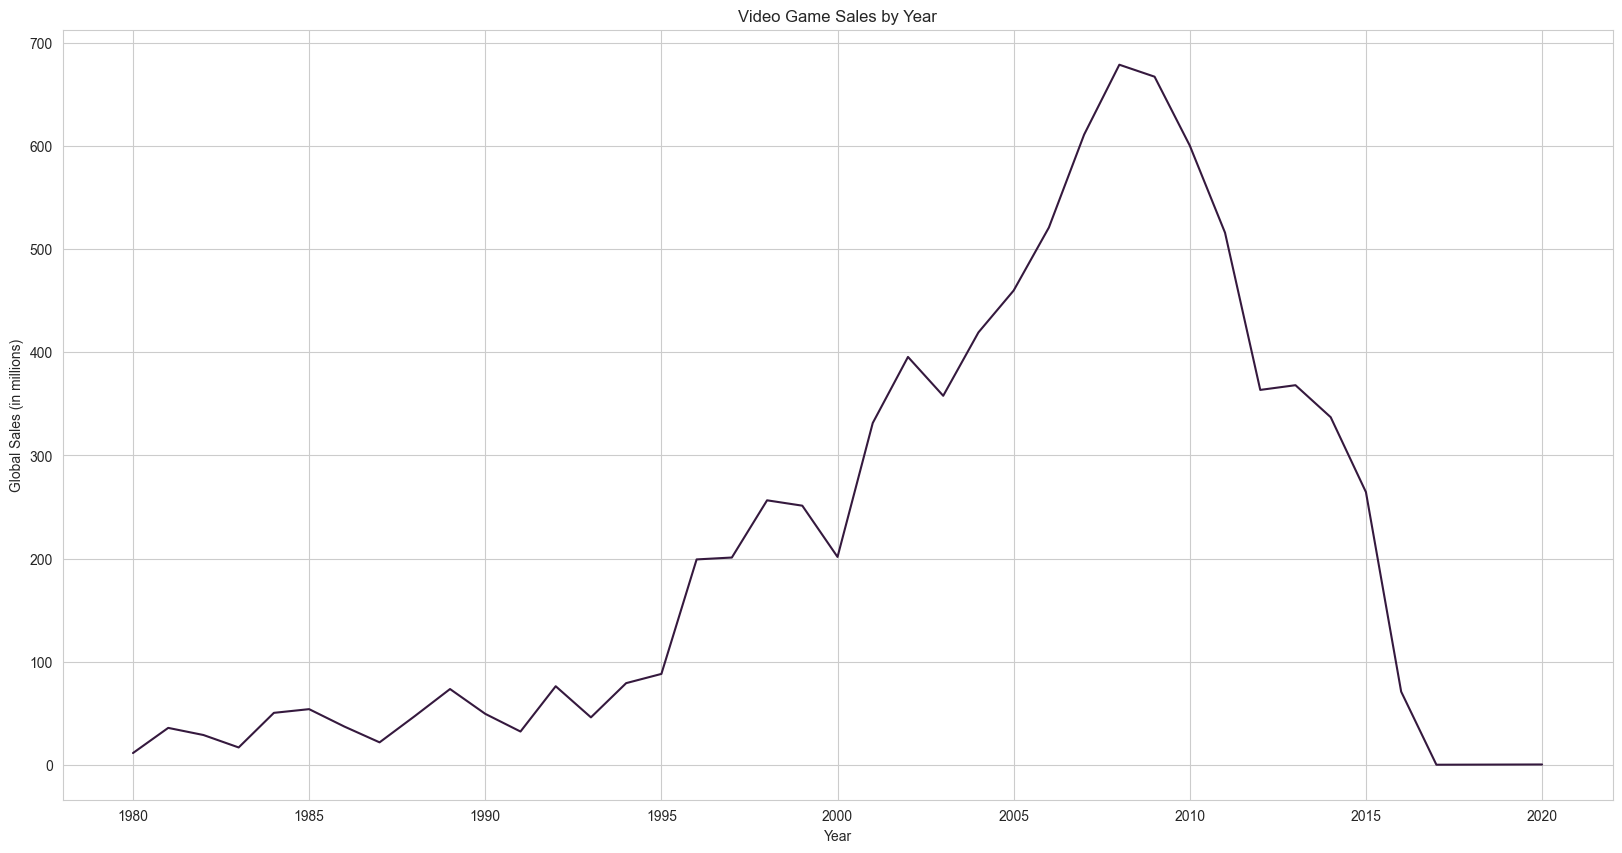

In [8]:
#Line chart of video game sales by year
yearly_sales = df.groupby("Year")["Global_Sales"].sum()
yearly_sales.plot(kind="line", figsize=(20,10))
plt.title("Video Game Sales by Year")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.show()

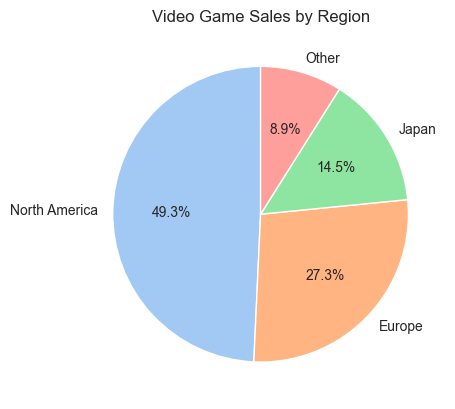

In [9]:
#Pie chart of video game sales by region
na_sales = df["NA_Sales"].sum()
eu_sales = df["EU_Sales"].sum()
jp_sales = df["JP_Sales"].sum()
other_sales = df["Other_Sales"].sum()
sales_by_region = [na_sales, eu_sales, jp_sales, other_sales]
region_labels = ["North America", "Europe", "Japan", "Other"]
plt.pie(sales_by_region, labels=region_labels, autopct="%1.1f%%", startangle=90,colors=sns.color_palette('pastel'))
plt.title("Video Game Sales by Region")
plt.show()

C:\Users\pavan\AppData\Local\Temp\ipykernel_16160\1033197678.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df.groupby('Name').sum().sort_values(by='Global_Sales', ascending=False)


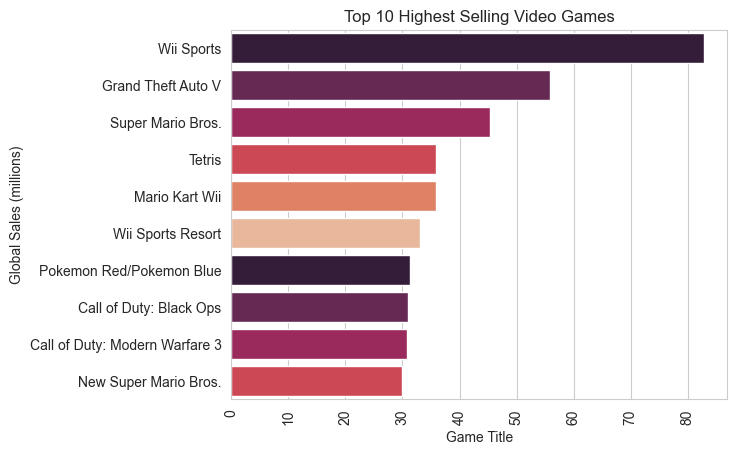

In [10]:
grouped_df = df.groupby('Name').sum().sort_values(by='Global_Sales', ascending=False)
top_10 = grouped_df[:10]
palette = sns.color_palette('rocket')
sns.barplot(x=top_10['Global_Sales'] ,y=top_10.index, palette=palette)
plt.title('Top 10 Highest Selling Video Games')
plt.xlabel('Game Title')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=90)
plt.show()

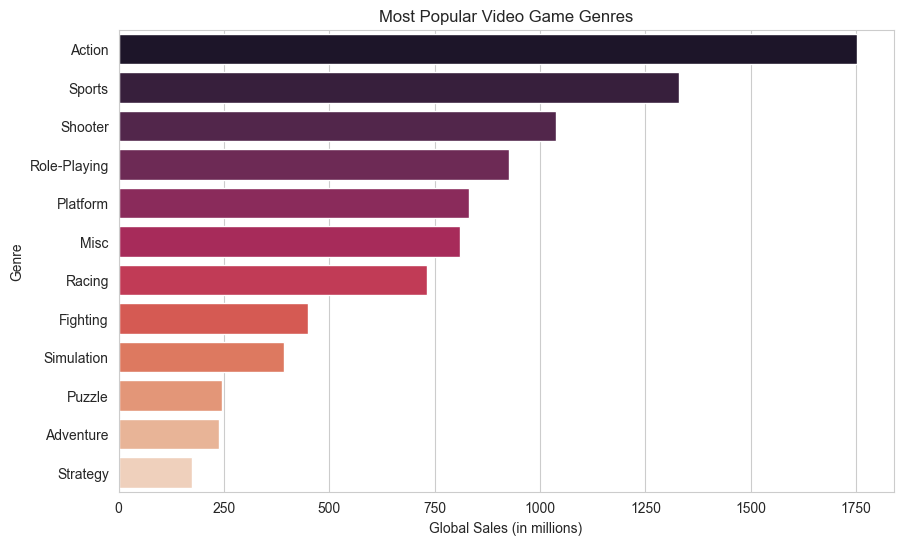

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()
genre_sales = genre_sales.sort_values(by='Global_Sales', ascending=False)
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='Global_Sales', y='Genre', data=genre_sales, palette='rocket')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Genre')
plt.title('Most Popular Video Game Genres')
plt.show()

In [12]:
df['Global_Sales'].describe()

count    16598.000000
mean         0.537441
std          1.555028
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: Global_Sales, dtype: float64

C:\Users\pavan\AppData\Local\Temp\ipykernel_16160\2253846668.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_categories = df.groupby('Platform_Category').sum().sort_values(by='Global_Sales', ascending=False).reset_index()


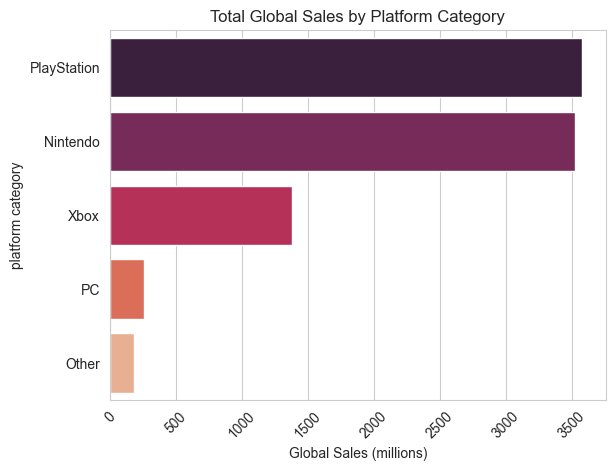

In [13]:
df_categories = df.groupby('Platform_Category').sum().sort_values(by='Global_Sales', ascending=False).reset_index()
colors = sns.color_palette('rocket', len(df_categories))
sns.barplot(x='Global_Sales', y='Platform_Category', data=df_categories, palette=colors)
plt.title('Total Global Sales by Platform Category')
plt.xlabel('Global Sales (millions)')
plt.ylabel('platform category')
plt.xticks(rotation=45)
plt.show()

In [14]:
df = pd.read_csv(r'C:\Users\pavan\OneDrive\Documents\DesktopFiles\LaptopStuff\VS_code\vgsales.csv')

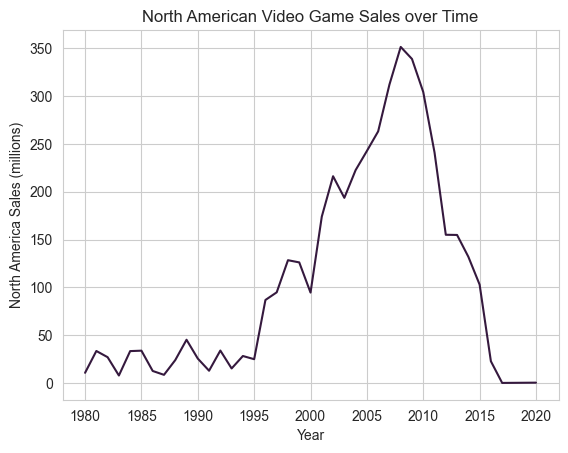

In [15]:
na_sales = df.loc[:, ["NA_Sales", "Year"]]
na_sales = na_sales.groupby("Year").sum()
plt.plot(na_sales.index, na_sales["NA_Sales"])
plt.xlabel("Year")
plt.ylabel("North America Sales (millions)")
plt.title("North American Video Game Sales over Time")
plt.show()

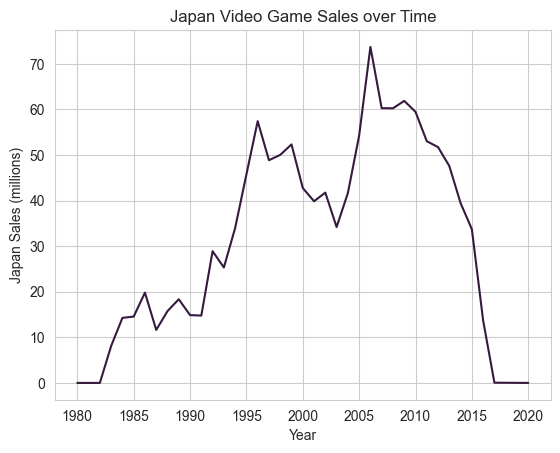

In [16]:
japan_sales = df.loc[:, ["JP_Sales", "Year"]]
japan_sales = japan_sales.groupby("Year").sum()
plt.plot(japan_sales.index, japan_sales["JP_Sales"])
plt.xlabel("Year")
plt.ylabel("Japan Sales (millions)")
plt.title("Japan Video Game Sales over Time")
plt.show()

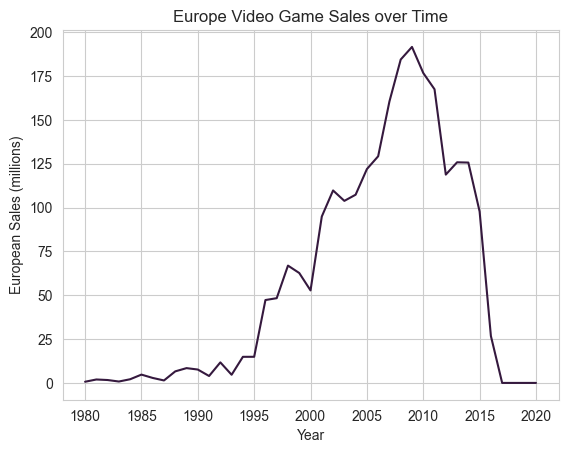

In [17]:
europe_sales = df.loc[:, ["EU_Sales", "Year"]]
europe_sales = europe_sales.groupby("Year").sum()
plt.plot(europe_sales.index, europe_sales["EU_Sales"])
plt.xlabel("Year")
plt.ylabel("European Sales (millions)")
plt.title("Europe Video Game Sales over Time")
plt.show()

C:\Users\pavan\AppData\Local\Temp\ipykernel_16160\2771557171.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_publishers = df.groupby('Publisher').sum().sort_values('Global_Sales', ascending=False).head(5).index
C:\Users\pavan\AppData\Local\Temp\ipykernel_16160\2771557171.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_publishers['Genre'] = df_top_publishers['Genre'].map(genre_map)


<Axes: xlabel='Genre', ylabel='count'>

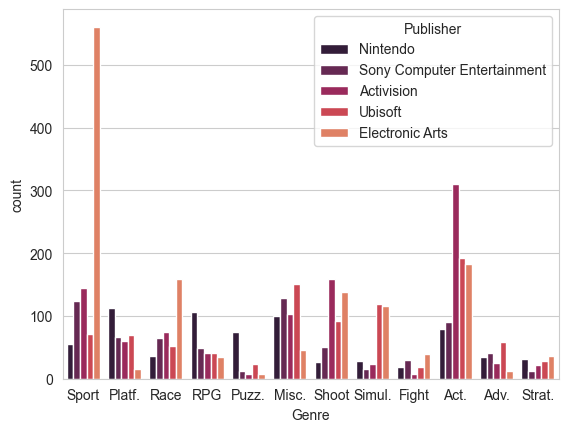

In [18]:
top_publishers = df.groupby('Publisher').sum().sort_values('Global_Sales', ascending=False).head(5).index
df_top_publishers = df[df['Publisher'].isin(top_publishers)]
genre_map = {
    'Sports': 'Sport',
    'Platform': 'Platf.',
    'Racing': 'Race',
    'Role-Playing': 'RPG',
    'Puzzle': 'Puzz.',
    'Misc': 'Misc.',
    'Shooter': 'Shoot',
    'Simulation': 'Simul.',
    'Action': 'Act.',
    'Fighting': 'Fight',
    'Strategy': 'Strat.',
    'Adventure': 'Adv.'
}
df_top_publishers['Genre'] = df_top_publishers['Genre'].map(genre_map)
sns.set_palette('rocket')
sns.countplot(x='Genre', hue='Publisher', data=df_top_publishers)

In [19]:
df = df.fillna(0)
df = df.drop_duplicates()
# Converting year to year with a different format
df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')
df['Year'] = df['Year'].dt.year
# generalizing the platforms with the company
platform_categories = {'2600': 'Other',
                       '3DO': 'Other',
                       '3DS': 'Nintendo',
                       'DC': 'Other',
                       'DS': 'Nintendo',
                       'GB': 'Nintendo',
                       'GBA': 'Nintendo',
                       'GC': 'Nintendo',
                       'GEN': 'Other',
                       'GG': 'Other',
                       'N64': 'Nintendo',
                       'NES': 'Nintendo',
                       'NG': 'Other',
                       'PC': 'PC',
                       'PCFX': 'Other',
                       'PS': 'PlayStation',
                       'PS2': 'PlayStation',
                       'PS3': 'PlayStation',
                       'PS4': 'PlayStation',
                       'PSP': 'PlayStation',
                       'PSV': 'PlayStation',
                       'SAT': 'Other',
                       'SCD': 'Other',
                       'SNES': 'Nintendo',
                       'TG16': 'Other',
                       'WS': 'Other',
                       'Wii': 'Nintendo',
                       'WiiU': 'Nintendo',
                       'X360': 'Xbox',
                       'XB': 'Xbox',
                       'XOne': 'Xbox'}
df['Platform_Category'] = df['Platform'].replace(platform_categories)
# checking for spaces and shit
df['Publisher'] = df['Publisher'].str.replace(' ', '_')

In [20]:
from scipy.stats import f_oneway
platforms = df['Platform_Category'].unique()
sales_by_platform = [df[df['Platform_Category'] == p]['Global_Sales'] for p in platforms]
f_stat, p_value = f_oneway(*sales_by_platform)
print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 8.890895753980573
p-value: 3.618985324113198e-07


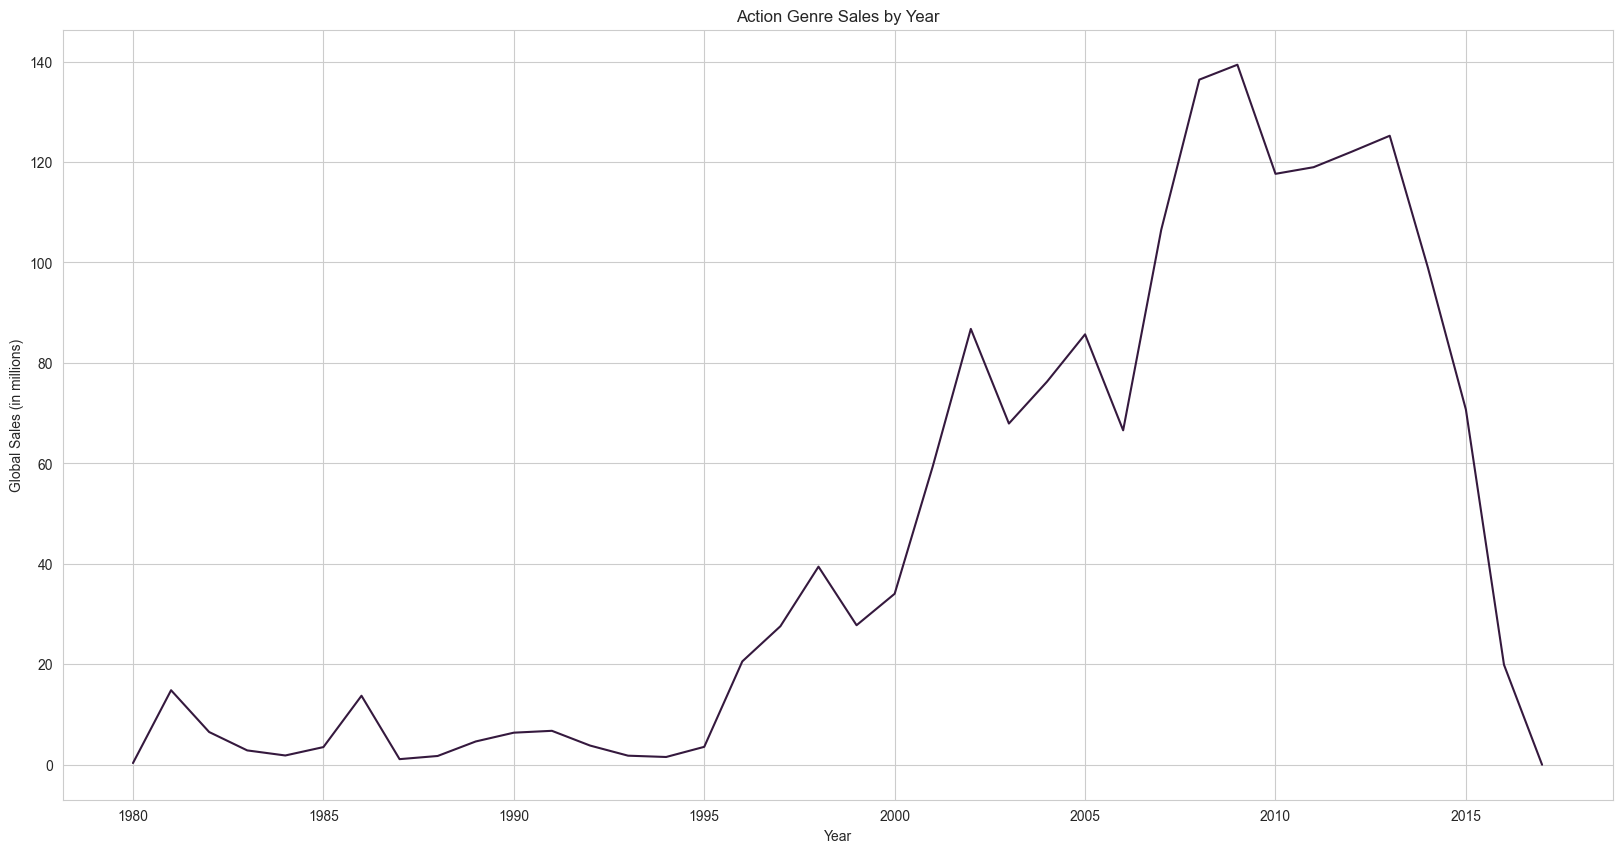

In [21]:
action_sales_data = df[df["Genre"] == "Action"]
yearly_sales = action_sales_data.groupby("Year")["Global_Sales"].sum()
sns.set_palette("rocket")
yearly_sales.plot(kind="line", figsize=(20,10))
plt.title("Action Genre Sales by Year")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.show()

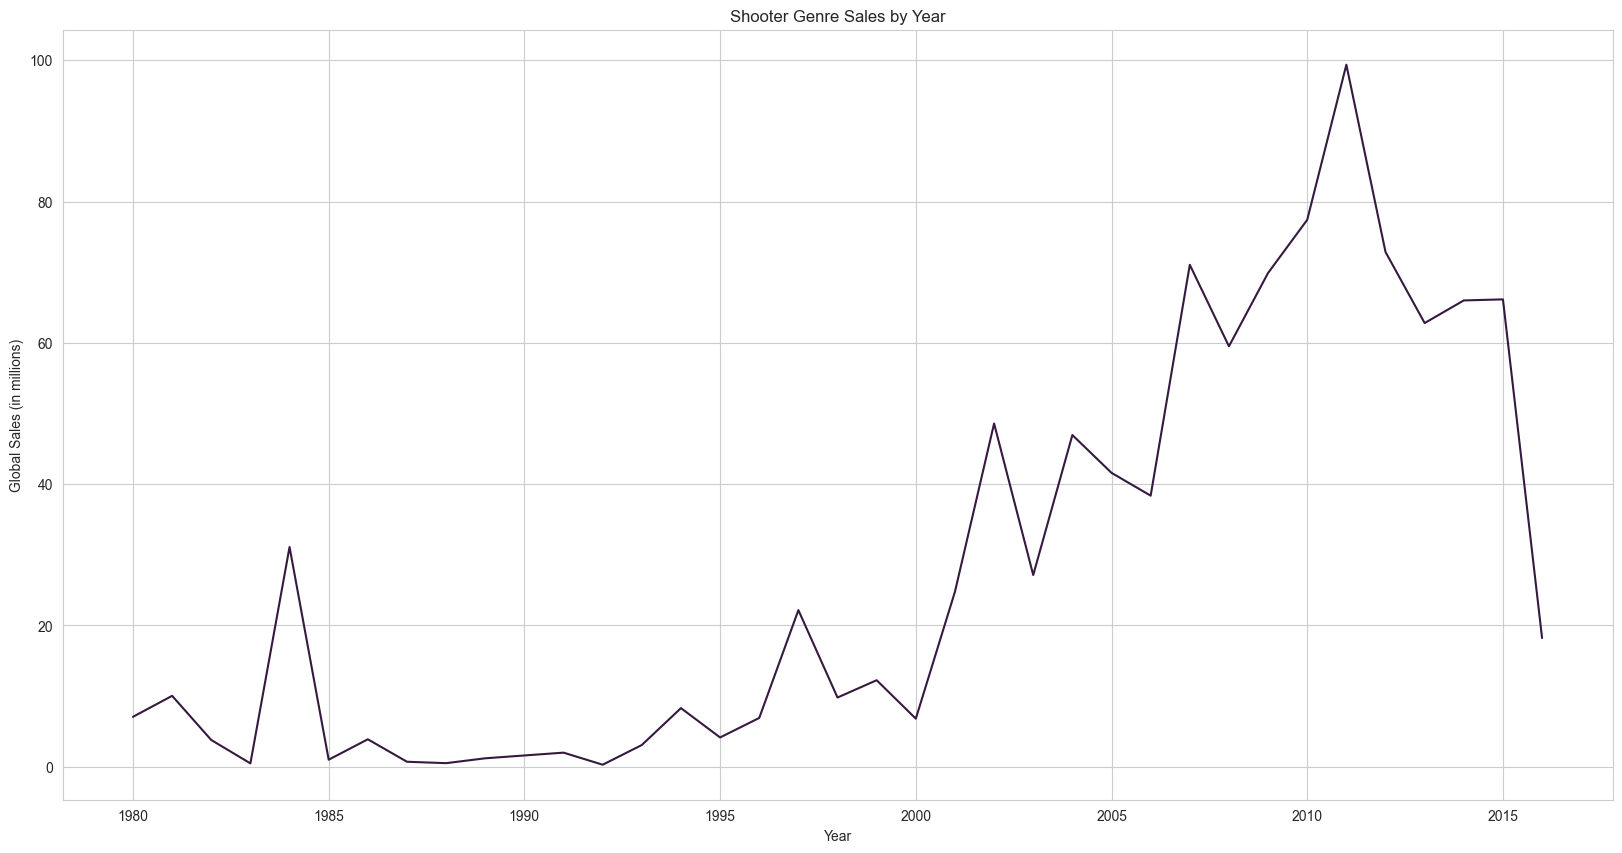

In [22]:
shooter_sales_data = df[df["Genre"] == "Shooter"]
yearly_sales = shooter_sales_data.groupby("Year")["Global_Sales"].sum()
yearly_sales.plot(kind="line", figsize=(20,10))
plt.title("Shooter Genre Sales by Year")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.show()

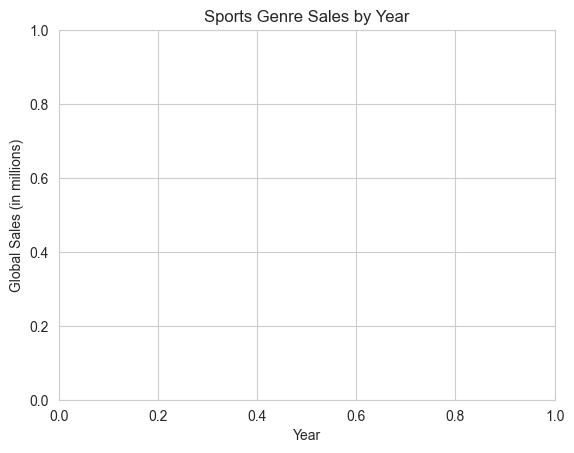

In [23]:

sports_sales_data = df[df["Genre"] == "Sports"]
yearly_sales = sports_sales_data.groupby("Year")["Global_Sales"].sum()
plt.title("Sports Genre Sales by Year")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.show()

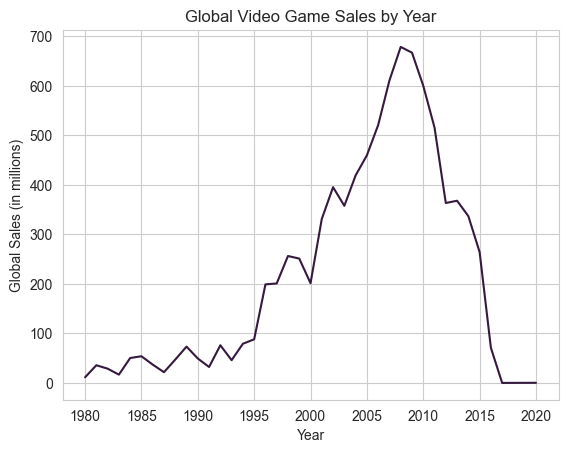

In [24]:
sales_by_year = df.groupby('Year')['Global_Sales'].sum().reset_index()
plt.plot(sales_by_year['Year'], sales_by_year['Global_Sales'])
plt.title('Global Video Game Sales by Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.show()

C:\Users\pavan\AppData\Local\Temp\ipykernel_16160\2661803130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  publisherData["Year"] = publisherData["Year"].astype("category")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\pavan\AppData\Local\Temp\ipykernel_16160\2661803130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  publisherData["Year"] = publisherData["Year"].astype("category

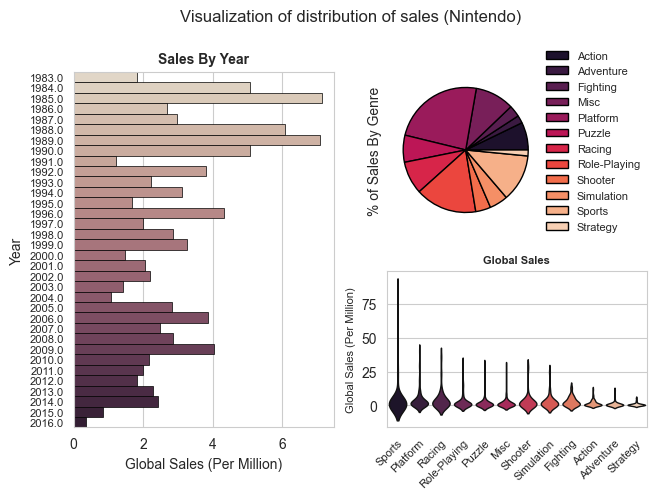

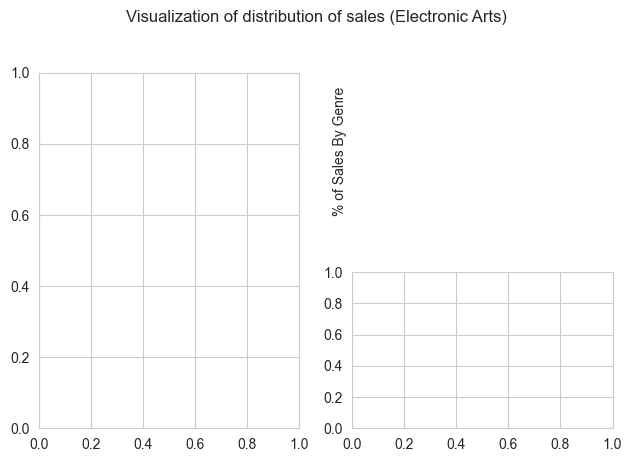

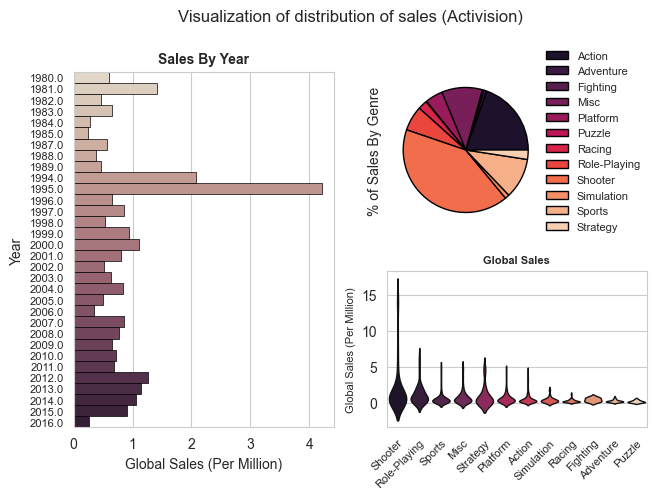

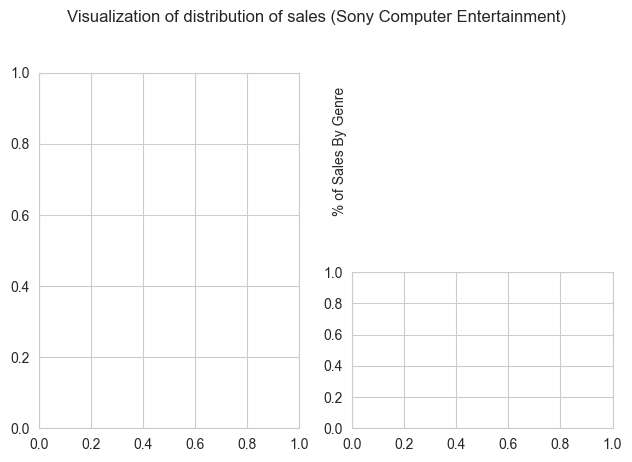

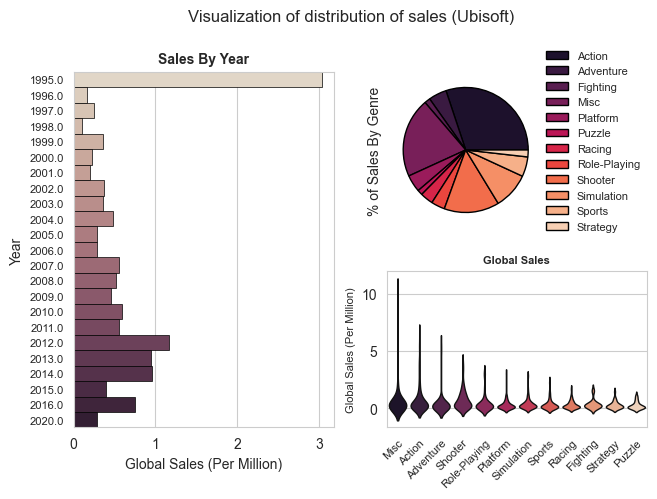

In [25]:
top5 = ["Nintendo", "Electronic Arts", "Activision", "Sony Computer Entertainment", "Ubisoft"]
#Selecting a colour palette
pal = sns.color_palette("rocket", 12)
pal = pal.as_hex()[0:12]

#Initializing a for loop to generate each visualization set for each publish in the top 5 array
for i in top5:
    #Querying for specifically one pulisher
    publisherData = df.query(f"Publisher == '{i}'")
    fig = plt.figure()
    
    #Initializing a subplot lay out of 3 figures
    gs = fig.add_gridspec(2,2)
    ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs[1, 1])
    ax3 = fig.add_subplot(gs[:, 0])
    fig.suptitle(f'Visualization of distribution of sales ({i})')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95], pad=1)
    
    #Generating a Violin plot of Global sales by Genre
    try:
        sns.violinplot(x="Genre", y="Global_Sales", data=publisherData,ax=ax2, scale="width", inner=None,linewidth=1, edgecolor="black", palette=pal)
        ax2.tick_params(labelrotation=45, axis="x", labelsize=8)
        plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        ax2.set_ylabel('Global Sales (Per Million)', fontsize=8)
        ax2.set_title('Global Sales', fontsize=8, fontweight="bold")
        ax2.set_xlabel('', fontsize=8)
    except:
        pass
    
    #Generating a Horizontal Bar plot of the Global sales by year
    try:
        publisherData["Year"] = publisherData["Year"].astype("category")
        sns.barplot(y="Year", x="Global_Sales", data=publisherData,ax=ax3, errorbar=None,palette="ch:.25", linewidth=0.5, edgecolor="black", width=1)
        ax3.set_ylabel('Year', fontsize=10)
        ax3.set_xlabel('Global Sales (Per Million)')
        ax3.tick_params(axis="y", labelsize=8)
        ax3.set_title('Sales By Year', fontsize=10, fontweight="bold")
    except:
        pass
    
    #Generating a pie chart of global sales by genre
    try:
        genregroup = publisherData.groupby(['Genre'])["Global_Sales"].sum()
        genregroup.plot(kind='pie', y=["Global_Sales"], ax=ax1, legend=True,labeldistance=None, wedgeprops={'edgecolor':'black','linewidth': 1, 'linestyle': 'solid'}, colors=pal)
        ax1.legend(bbox_to_anchor=(1.68,1.2), loc="upper right", prop={"size":8}, frameon=False)
        box = ax1.get_position()
        box.x0 = box.x0 - 0.08
        box.x1 = box.x1 - 0.08
        ax1.set_position(box)
        ax1.set_ylabel('% of Sales By Genre', fontsize=10)
    except:
        pass
    

<Axes: title={'center': 'Summary of volume of games by year by publisher'}, xlabel='Year', ylabel='Count of Games'>

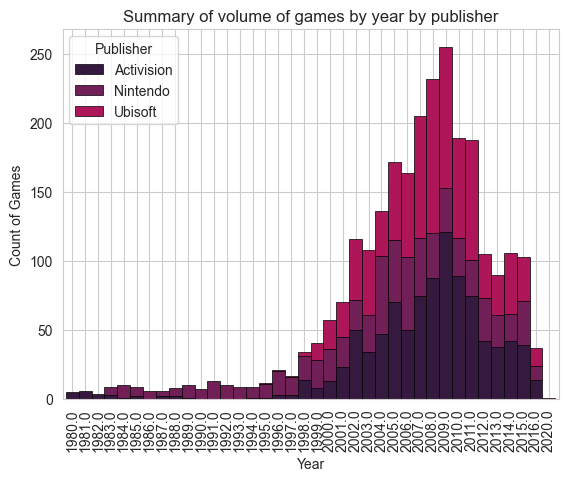

In [26]:
import seaborn as sns

top5data = df.copy()
top5data = top5data[top5data["Publisher"].isin(top5)]
top5dataSlice = top5data.loc[:, ["Year", "Publisher", "Global_Sales"]]
sales = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]

sns.set_palette("rocket")
countData = top5dataSlice.groupby(["Publisher","Year"]).size().reset_index().pivot(columns="Publisher", index="Year", values=0)
countData.plot(kind="bar", stacked=True, linewidth=0.5, edgecolor="black", width=1, ylabel="Count of Games", title="Summary of volume of games by year by publisher")


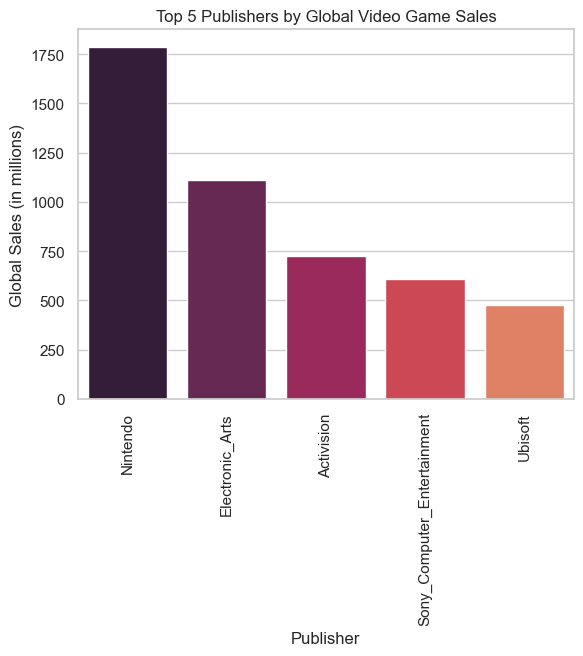

In [27]:

# Group the data by publishers and sum the global sales
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum()

# Sort the data in descending order of global sales and take the top 5 publishers
top_publishers = publisher_sales.sort_values(ascending=False)[:5]

# Create a barplot of top publishers and global sales
sns.set(style='whitegrid')
sns.set_palette('rocket')
sns.barplot(x=top_publishers.index, y=top_publishers.values)

# Add labels and title
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in millions)')
plt.title('Top 5 Publishers by Global Video Game Sales')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.show()



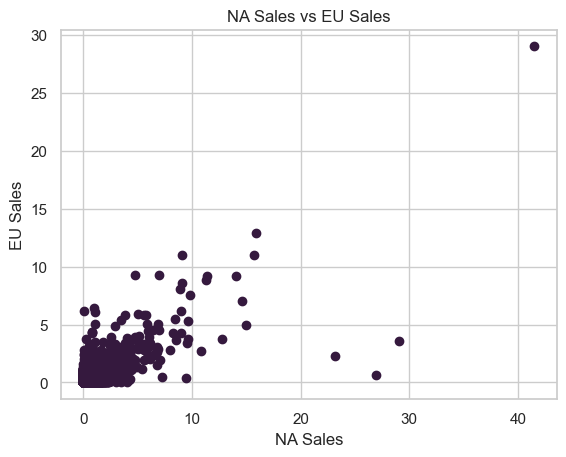

Correlation coefficient: 0.767726748370263


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the video game sales data


# Select the variables for NA sales and EU sales
na_sales = df['NA_Sales']
eu_sales = df['EU_Sales']

# Create a scatter plot
plt.scatter(na_sales, eu_sales)
plt.title('NA Sales vs EU Sales')
plt.xlabel('NA Sales')
plt.ylabel('EU Sales')
plt.show()

# Calculate the correlation coefficient
corr_coef = na_sales.corr(eu_sales)
print('Correlation coefficient:', corr_coef)


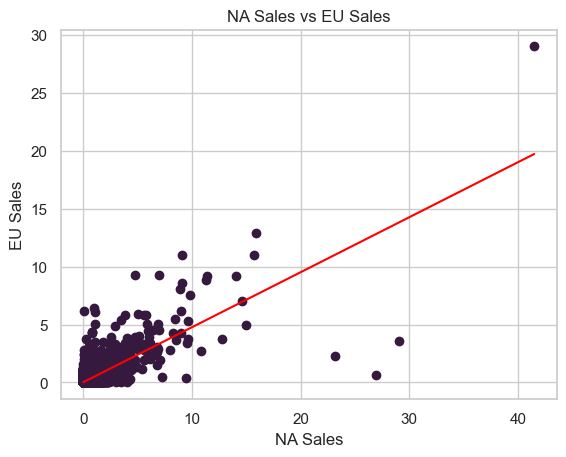

Slope: 0.47505781761363225
Intercept: 0.02091967466647751


In [29]:
# Fit a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = na_sales.values.reshape(-1, 1)  # Reshape the input data to match the expected format
y = eu_sales.values
model.fit(X, y)

# Plot the regression line
plt.scatter(na_sales, eu_sales)
plt.plot(na_sales, model.predict(X), color='red')
plt.title('NA Sales vs EU Sales')
plt.xlabel('NA Sales')
plt.ylabel('EU Sales')
plt.show()

# Print the slope and intercept of the regression line
print('Slope:', model.coef_[0])
print('Intercept:', model.intercept_)



The distribution of game sales by genre can be seen in the boxplots below:



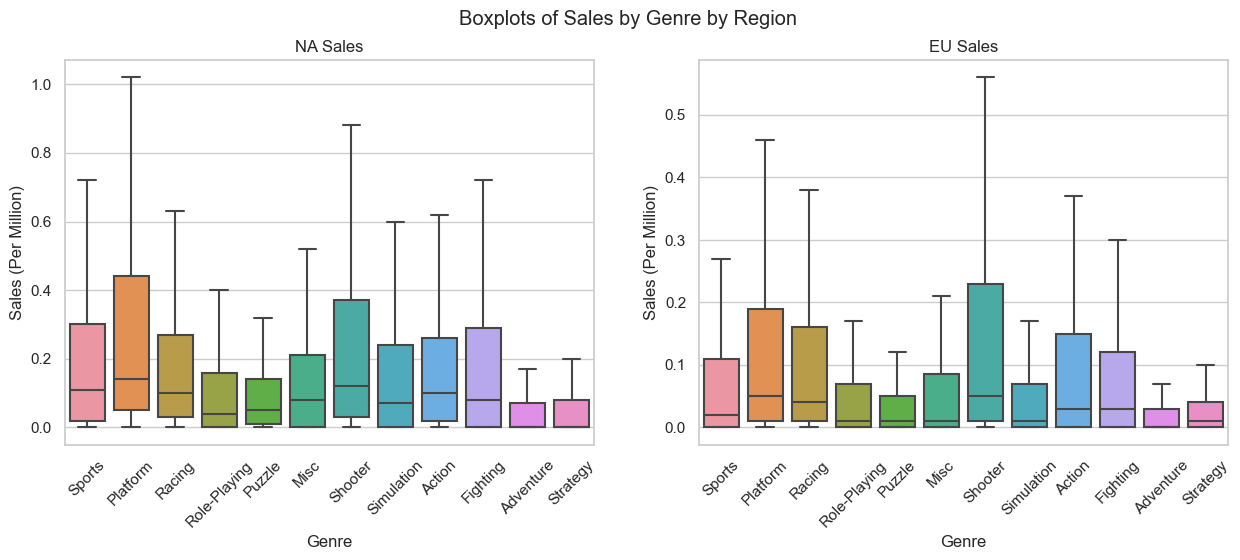

In [30]:
#Finding and saving a list of all unique Genres
genres = df["Genre"].unique()

#Creating a subplot:
print("\n\nThe distribution of game sales by genre can be seen in the boxplots below:")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Boxplots of Sales by Genre by Region')
#Plotting NA region sales in Subplot 1
sns.boxplot(x="Genre", y="NA_Sales", data=df, showfliers=False,ax=ax1)
ax1.tick_params(labelrotation=45, axis="x")
ax1.set_ylabel('Sales (Per Million)')
ax1.set_title('NA Sales')
#Plotting EU region sales in Subplot 2
ax2=sns.boxplot(x="Genre", y="EU_Sales", data=df, showfliers=False)
ax2.tick_params(labelrotation=45, axis="x")
ax2.set_ylabel('Sales (Per Million)')
ax2.set_title('EU Sales')
print("")

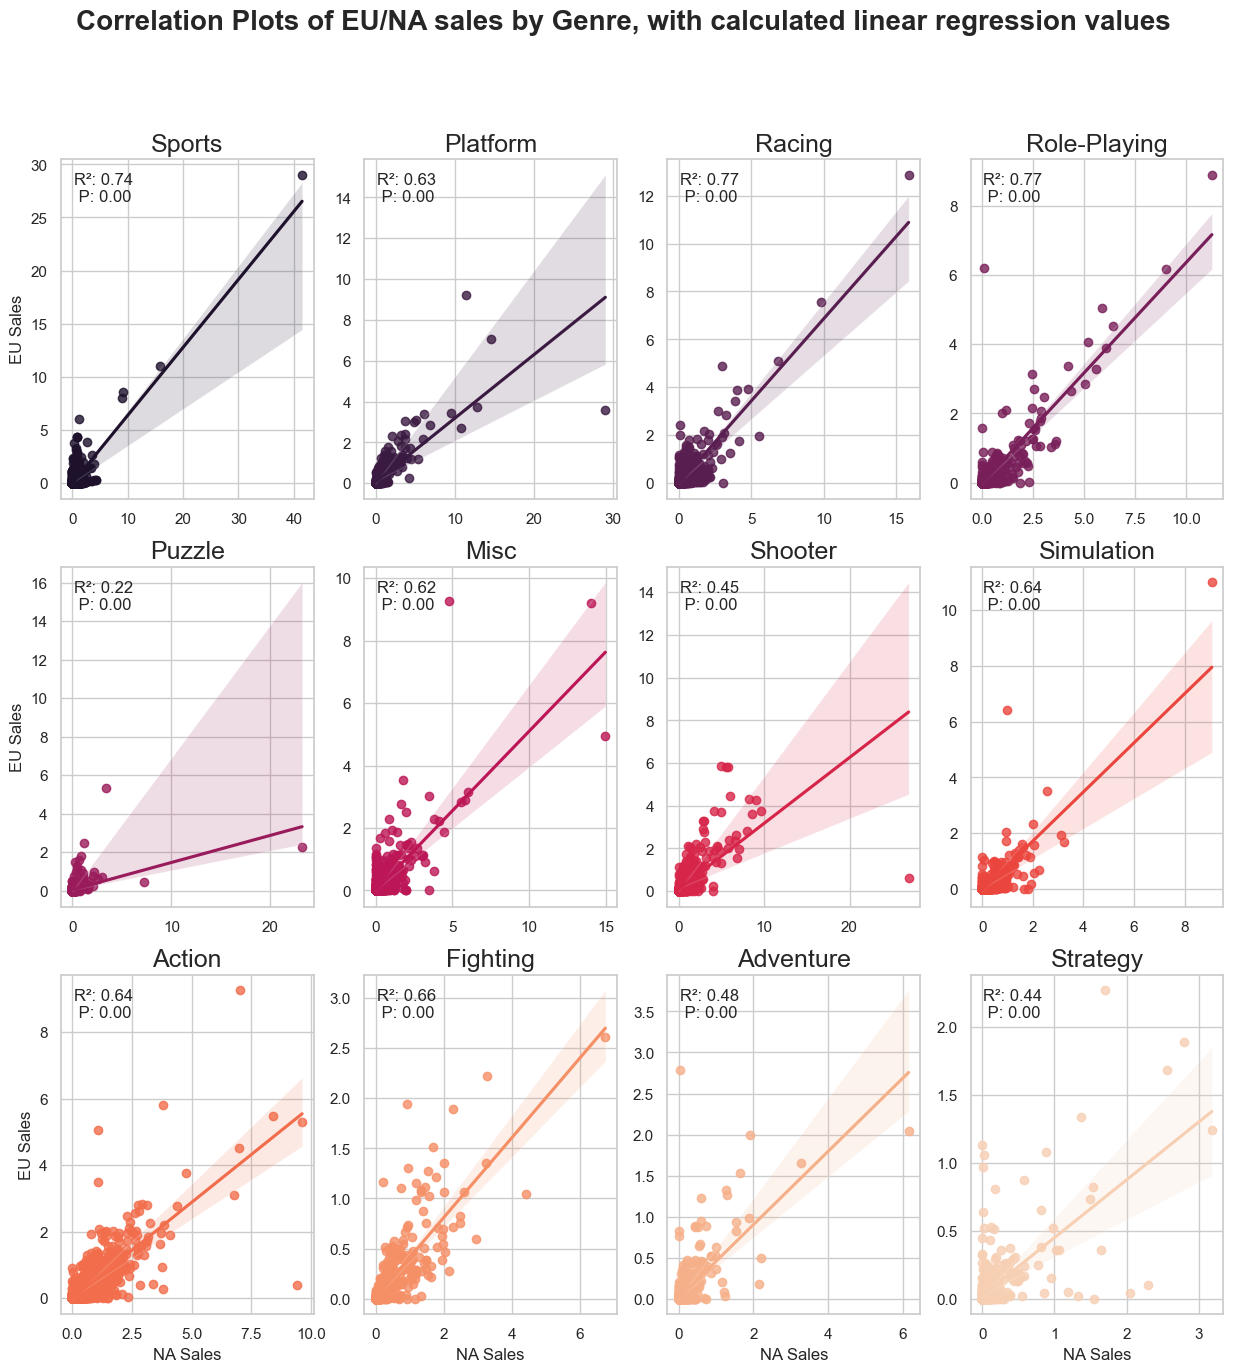

In [31]:
from scipy import stats
fig, axes = plt.subplots(3, 4, figsize=(15,15))
fig.suptitle(f'Correlation Plots of EU/NA sales by Genre, with calculated linear regression values', fontsize=20, fontweight="bold", wrap=True)

x=0
y=0
z=0
for i in genres:
    genreData = df.query(f"Genre == '{i}'")
    sns.regplot(data=genreData, ax=axes[y,x], x="NA_Sales", y="EU_Sales", color=pal[z])
    axes[y,x].set_title(i, fontsize=18)
    datax = genreData["EU_Sales"]
    datay = genreData["NA_Sales"]
    res = stats.linregress(datax, datay)
    axes[y,x].text(0.05,0.925, f"R\u00b2: {res.rvalue**2:.2f}", transform=axes[y,x].transAxes)
    axes[y,x].text(0.05,0.875, f" P: {res.pvalue**2:.2f}", transform=axes[y,x].transAxes)

    if x==0:
        axes[y,x].set_ylabel('EU Sales')
    else:
        axes[y,x].set_ylabel('')
    if y==2:
        axes[y,x].set_xlabel('NA Sales')
    else:
        axes[y,x].set_xlabel('')
    x=x+1
    z=z+1
    if x==4:
        x=0
        y=y+1

In [32]:
df = pd.read_csv(r"C:\Users\pavan\OneDrive\Documents\DesktopFiles\LaptopStuff\VS_code\Video_Games_Sales_as_at_22_Dec_2016.csv")

In [33]:
df

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0          Nintendo     41.36     28.96      3.77         8.45         82.53   
1          Nintendo     29.08      3.58      6.81         0.77         40.24   
2          Nintendo     15.68     12.76      3.79         3.29         35.52   
3          Nintendo     15.61     10.93      3.28         2.95         32.77   
4          Nintendo     11.27      8.89     10.22         1.00         31.37   
...             ...       ...       ...       ...          ...           ...   
16714    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   
16715   Codemasters      0.00      0.01      0.00         0.00          0.01   
16716  Idea Factory      0.00      0.00      0.01         0.00          0.01   
16717       Wanadoo      0.01      0.00      0.00         0.00          0.01   
16718    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   

       Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0              76.0          51.0          8       322.0  Nintendo      E  
1               NaN           NaN        NaN         NaN       NaN    NaN  
2              82.0          73.0        8.3       709.0  Nintendo      E  
3              80.0          73.0          8       192.0  Nintendo      E  
4               NaN           NaN        NaN         NaN       NaN    NaN  
...             ...           ...        ...         ...       ...    ...  
16714           NaN           NaN        NaN         NaN       NaN    NaN  
16715           NaN           NaN        NaN         NaN       NaN    NaN  
16716           NaN           NaN        NaN         NaN       NaN    NaN  
16717           NaN           NaN        NaN         NaN       NaN    NaN  
16718           NaN           NaN        NaN         NaN       NaN    NaN  

[16719 rows x 16 columns]

In [48]:
cols = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',"Critic_Count"]
corr_matrix = df[cols].corr()
print(corr_matrix)

                 Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.092562  0.003842 -0.168386     0.037700   
NA_Sales               -0.092562  1.000000  0.765336  0.449598     0.638654   
EU_Sales                0.003842  0.765336  1.000000  0.435068     0.722796   
JP_Sales               -0.168386  0.449598  0.435068  1.000000     0.291096   
Other_Sales             0.037700  0.638654  0.722796  0.291096     1.000000   
Global_Sales           -0.076433  0.941010  0.901239  0.612300     0.749242   
Critic_Score            0.011411  0.240755  0.220752  0.152593     0.198554   
Critic_Count            0.223407  0.295413  0.277533  0.180219     0.251639   

                 Global_Sales  Critic_Score  Critic_Count  
Year_of_Release     -0.076433      0.011411      0.223407  
NA_Sales             0.941010      0.240755      0.295413  
EU_Sales             0.901239      0.220752      0.277533  
JP_Sales             0.612300      0.152593     

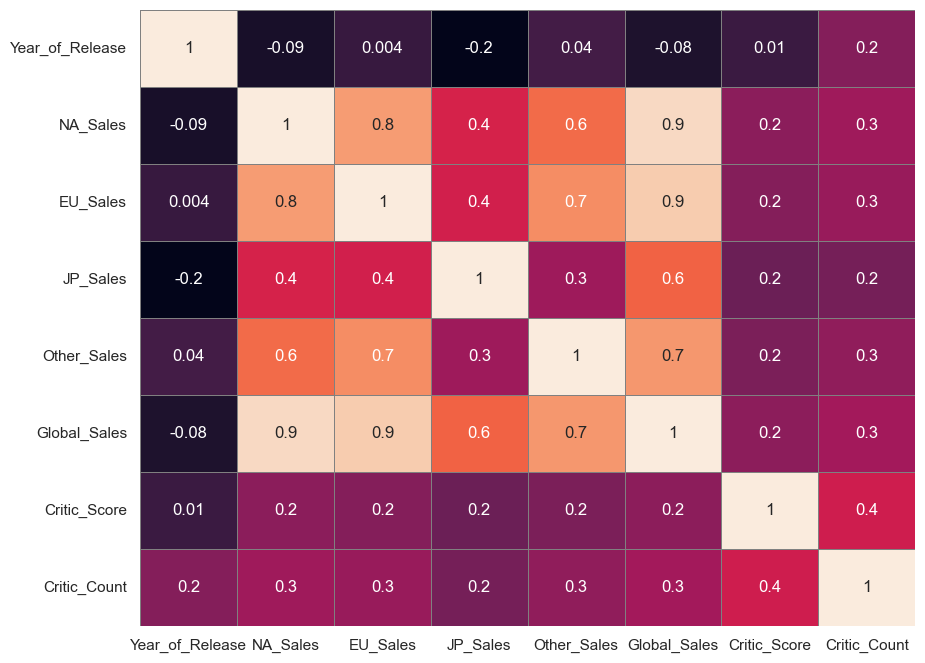

In [49]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.1g', cmap="rocket", cbar=False, linewidths=0.5, linecolor='grey');


Strong positive correlation between critic score and global sales: This suggests that games that receive higher critic scores tend to sell more globally. This makes sense as a higher critic score can increase the visibility and credibility of a game, which can lead to more sales. For game developers and publishers, this indicates that investing in creating high-quality games that are well-received by critics can lead to increased global sales.

Strong positive correlation between critic count and global sales: Similarly, the strong positive correlation between critic count and global sales indicates that games with more critic reviews tend to sell more globally. This suggests that having more reviews from trusted sources can increase a game's exposure and credibility, which can lead to more sales. For game developers and publishers, this suggests that reaching out to critics and getting their reviews of a game can be an effective marketing strategy.

Moderate positive correlation between user count and global sales: The moderate positive correlation between user count and global sales suggests that games with more user reviews tend to sell more globally. This makes sense as user reviews can influence the purchasing decisions of other users and increase a game's visibility and credibility. For game developers and publishers, this highlights the importance of encouraging users to leave reviews and ratings of their games on platforms like Steam or the App Store.

Weak positive correlation between year of release and global sales: While the correlation between year of release and global sales is weak, it still suggests that newer games tend to sell more globally than older ones. This could be due to a variety of factors, such as increased marketing and advertising for newer games, advancements in technology, and changing consumer preferences. For game developers and publishers, this highlights the importance of keeping up with trends and constantly innovating to stay competitive in the market.

Stronger correlation between North American sales and global sales: The heatmap shows that North American sales have a stronger correlation with global sales compared to European and Japanese sales. This suggests that the North American market has a greater influence on global sales compared to the European and Japanese markets. For game developers and publishers, this highlights the importance of understanding regional market trends and adapting their marketing strategies accordingly.

Weak positive correlation between critic score and user count: The weak positive correlation between critic score and user count suggests that games that receive higher critic scores also tend to have more user reviews. This could be due to the fact that games with higher critic scores are more likely to be played and reviewed by a larger number of users. For game developers and publishers, this suggests that investing in creating high-quality games that are well-received by critics can lead to increased exposure and user engagement.

Weak negative correlation between year of release and critic count: Finally, the weak negative correlation between year of release and critic count suggests that older games tend to have more critic reviews compared to newer games. This could be due to the fact that older games have had more time to accumulate reviews and build a reputation among critics. For game developers and publishers, this highlights the importance of continuing to promote and market games even after their initial release, in order to maintain interest and engagement among critics and users.

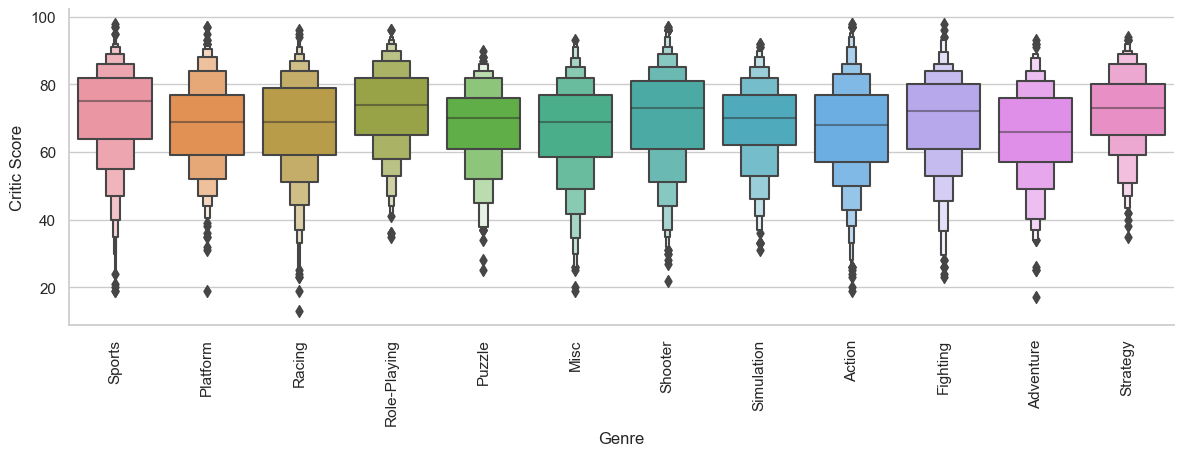

In [36]:
import seaborn as sns

# Create the categorical plot
sns.catplot(x="Genre", y="Critic_Score", data=df, kind="boxen", height=4, aspect=3)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Add labels for the x- and y-axes
plt.xlabel("Genre")
plt.ylabel("Critic Score")

# Display the plot
plt.show()


The categorical plot provides a visual representation of how the Critic_Score variable varies across different categories of the Genre variable. Each box in the plot represents the distribution of Critic_Score values for a particular genre, with the box indicating the interquartile range (IQR) and the line inside the box indicating the median score. The whiskers extend to the minimum and maximum values within 1.5 times the IQR, and any data points outside this range are considered outliers.

Based on this plot, we can draw the following conclusions:

Shooter games tend to receive better reviews from critics than other genres, as indicated by the higher median Critic_Score value and the fact that most of the data points are above the median. This may be due to the popularity of first-person shooter games and their high production values.

Role-Playing games have a more spread out distribution of Critic_Score values compared to other genres, as indicated by the longer whiskers and the fact that the box is wider. This suggests that critics have a wider range of opinions about Role-Playing games, possibly due to the diversity of gameplay mechanics and storylines within this genre.

Simulation games have the smallest IQR, indicating that Simulation games are more consistently reviewed by critics compared to other genres. This may be due to the fact that Simulation games tend to have a narrower focus and more defined gameplay mechanics.

Some genres, such as Puzzle, Fighting, and Strategy, have a relatively low number of data points compared to other genres, which may limit our ability to draw definitive conclusions about the relationship between Genre and Critic_Score for these genres. However, we can still observe that the median Critic_Score for these genres is generally around the middle of the range, indicating that critics have mixed opinions about these genres.

It's important to note that the conclusions we can draw from the categorical plot are based on the data we have available, and may not necessarily be representative of the entire population of video games. Additionally, the plot only shows the relationship between Critic_Score and Genre, and does not take into account other factors that may affect the relationship, such as the platform, release date, or publisher of the game. Therefore, we should interpret the results of the plot with caution and consider additional analyses before making any definitive conclusions.

library(corrplot)

cols <- c('Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Count')
corr_matrix <- cor(df[cols], use = "complete.obs")
print(corr_matrix)

corrplot(corr_matrix, method="circle", type="upper", tl.col="black", tl.srt=45, tl.pos="lt", diag=FALSE, p.mat = corr_matrix, sig.level = 0.05, insig="blank", col=brewer.pal(n=8, name="RdYlBu"))




library(ggplot2)

# Create the categorical plot
ggplot(df, aes(x=Genre, y=Critic_Score)) + 
  geom_boxplot() + 
  theme(axis.text.x = element_text(angle = 90)) +
  xlab("Genre") +
  ylab("Critic Score") +
  ggtitle("Critic Scores by Genre")





